# EDA Notebook

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Paths
RAW_DATA_PATH = Path("../data/raw")
PROCESSED_DATA_PATH = Path("../data/processed")
VIZ_PATH = Path("../visualizations")
VIZ_PATH.mkdir(exist_ok=True, parents=True)

print("✅ Setup complete")

✅ Setup complete


In [18]:
# Load Sample Data (Week 1)
# Load input, output, and supplementary data for one week
week = "01"

input_df = pd.read_csv(RAW_DATA_PATH / f"input_2023_w{week}.csv")
output_df = pd.read_csv(RAW_DATA_PATH / f"output_2023_w{week}.csv")
supp_df = pd.read_csv(RAW_DATA_PATH / "supplementary_data.csv")

print(f"Input shape: {input_df.shape}")
print(f"Output shape: {output_df.shape}")
print(f"Supplementary shape: {supp_df.shape}")

Input shape: (285714, 23)
Output shape: (32088, 6)
Supplementary shape: (18009, 41)


In [19]:
# Data Overview
print("=" * 80)
print("INPUT DATA SAMPLE")
print("=" * 80)
display(input_df.head())

print("\n" + "=" * 80)
print("OUTPUT DATA SAMPLE")
print("=" * 80)
display(output_df.head())

print("\n" + "=" * 80)
print("SUPPLEMENTARY DATA SAMPLE")
print("=" * 80)
display(supp_df.head())

INPUT DATA SAMPLE


,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
0,2023090700,101,False,54527,1,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.09,0.39,322.40,238.24,21,63.259998,-0.22
1,2023090700,101,False,54527,2,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.04,0.61,200.89,236.05,21,63.259998,-0.22
2,2023090700,101,False,54527,3,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.93,0.12,0.73,147.55,240.60,21,63.259998,-0.22
3,2023090700,101,False,54527,4,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.35,36.92,0.23,0.81,131.40,244.25,21,63.259998,-0.22
4,2023090700,101,False,54527,5,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.37,36.90,0.35,0.82,123.26,244.25,21,63.259998,-0.22



OUTPUT DATA SAMPLE


,game_id,play_id,nfl_id,frame_id,x,y
0,2023090700,101,46137,1,56.22,17.28
1,2023090700,101,46137,2,56.63,16.88
2,2023090700,101,46137,3,57.06,16.46
3,2023090700,101,46137,4,57.48,16.02
4,2023090700,101,46137,5,57.91,15.56



SUPPLEMENTARY DATA SAMPLE


,game_id,season,week,game_date,game_time_eastern,home_team_abbr,visitor_team_abbr,play_id,play_description,quarter,...,team_coverage_type,penalty_yards,pre_penalty_yards_gained,yards_gained,expected_points,expected_points_added,pre_snap_home_team_win_probability,pre_snap_visitor_team_win_probability,home_team_win_probability_added,visitor_team_win_probility_added
0,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,3461,(10:46) (Shotgun) J.Goff pass deep left to J.R...,4,...,COVER_2_ZONE,NaN,18,18,-0.664416,2.945847,0.834296,0.165704,-0.081149,0.081149
1,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,461,(7:30) J.Goff pass short right to J.Reynolds t...,1,...,COVER_6_ZONE,NaN,21,21,1.926131,1.345633,0.544618,0.455382,-0.029415,0.029415
2,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1940,(:09) (Shotgun) J.Goff pass incomplete deep ri...,2,...,COVER_2_ZONE,NaN,0,0,0.281891,-0.081964,0.771994,0.228006,0.000791,-0.000791
3,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1711,"(:45) (No Huddle, Shotgun) P.Mahomes pass deep...",2,...,COVER_2_ZONE,NaN,26,26,3.452352,2.342947,0.663187,0.336813,0.041843,-0.041843
4,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1588,(1:54) (Shotgun) P.Mahomes pass incomplete dee...,2,...,COVER_4_ZONE,NaN,0,0,1.921525,-0.324035,0.615035,0.384965,0.000061,-0.000061


In [20]:
# Data Types and Missing Values
def analyze_missing(df, name):
    print(f"\n{'=' * 80}")
    print(f"{name} - MISSING VALUES")
    print("=" * 80)
    missing = df.isna().mean().sort_values(ascending=False)
    missing_pct = missing[missing > 0] * 100
    
    if len(missing_pct) > 0:
        print(missing_pct.to_string())
    else:
        print("✅ No missing values!")
    
    return missing_pct

input_missing = analyze_missing(input_df, "INPUT")
output_missing = analyze_missing(output_df, "OUTPUT")
supp_missing = analyze_missing(supp_df, "SUPPLEMENTARY")


INPUT - MISSING VALUES
✅ No missing values!

OUTPUT - MISSING VALUES
✅ No missing values!

SUPPLEMENTARY - MISSING VALUES
penalty_yards                 97.445722
yardline_side                  1.393748
pass_location_type             0.111056
team_coverage_man_zone         0.027764
team_coverage_type             0.027764
route_of_targeted_receiver     0.022211
dropback_type                  0.005553
dropback_distance              0.005553
play_action                    0.005553


In [21]:
# Merge Data for Analysis
# Merge input with supplementary on (game_id, play_id)
merged_df = input_df.merge(
    supp_df,
    on=['game_id', 'play_id'],
    how='left'
)

print(f"Merged shape: {merged_df.shape}")
print(f"Unique plays: {merged_df[['game_id', 'play_id']].drop_duplicates().shape[0]}")
print(f"Unique players: {merged_df['nfl_id'].nunique()}")

Merged shape: (285714, 62)
Unique plays: 819
Unique players: 737


In [22]:
# Validate Relationships
print("=" * 80)
print("DATA VALIDATION")
print("=" * 80)

# Check player_to_predict distribution
print("\n1. Players to Predict Distribution:")
print(input_df['player_to_predict'].value_counts())

# Check num_frames_output vs actual output frames
print("\n2. Validating num_frames_output:")
sample_plays = input_df[['game_id', 'play_id', 'nfl_id', 'num_frames_output']].drop_duplicates().head(10)

for _, row in sample_plays.iterrows():
    actual_frames = output_df[
        (output_df['game_id'] == row['game_id']) &
        (output_df['play_id'] == row['play_id']) &
        (output_df['nfl_id'] == row['nfl_id'])
    ]['frame_id'].max()
    
    expected = row['num_frames_output']
    match = "✅" if actual_frames == expected else "❌"
    print(f"  Game {row['game_id']}, Play {row['play_id']}, Player {row['nfl_id']}: "
          f"Expected {expected}, Got {actual_frames} {match}")

# Check join success
print(f"\n3. Join Success Rate:")
print(f"  Rows with supplementary data: {merged_df['pass_result'].notna().sum()} / {len(merged_df)}")
print(f"  Success rate: {merged_df['pass_result'].notna().mean() * 100:.2f}%")

DATA VALIDATION

1. Players to Predict Distribution:
player_to_predict
False    209315
True      76399
Name: count, dtype: int64

2. Validating num_frames_output:
  Game 2023090700, Play 101, Player 54527: Expected 21, Got nan ❌
  Game 2023090700, Play 101, Player 46137: Expected 21, Got 21 ✅
  Game 2023090700, Play 101, Player 52546: Expected 21, Got 21 ✅
  Game 2023090700, Play 101, Player 53487: Expected 21, Got nan ❌
  Game 2023090700, Play 101, Player 54486: Expected 21, Got nan ❌
  Game 2023090700, Play 101, Player 53541: Expected 21, Got nan ❌
  Game 2023090700, Play 101, Player 53959: Expected 21, Got nan ❌
  Game 2023090700, Play 101, Player 43290: Expected 21, Got nan ❌
  Game 2023090700, Play 101, Player 44930: Expected 21, Got 21 ✅
  Game 2023090700, Play 194, Player 44888: Expected 9, Got 9 ✅

3. Join Success Rate:
  Rows with supplementary data: 285714 / 285714
  Success rate: 100.00%


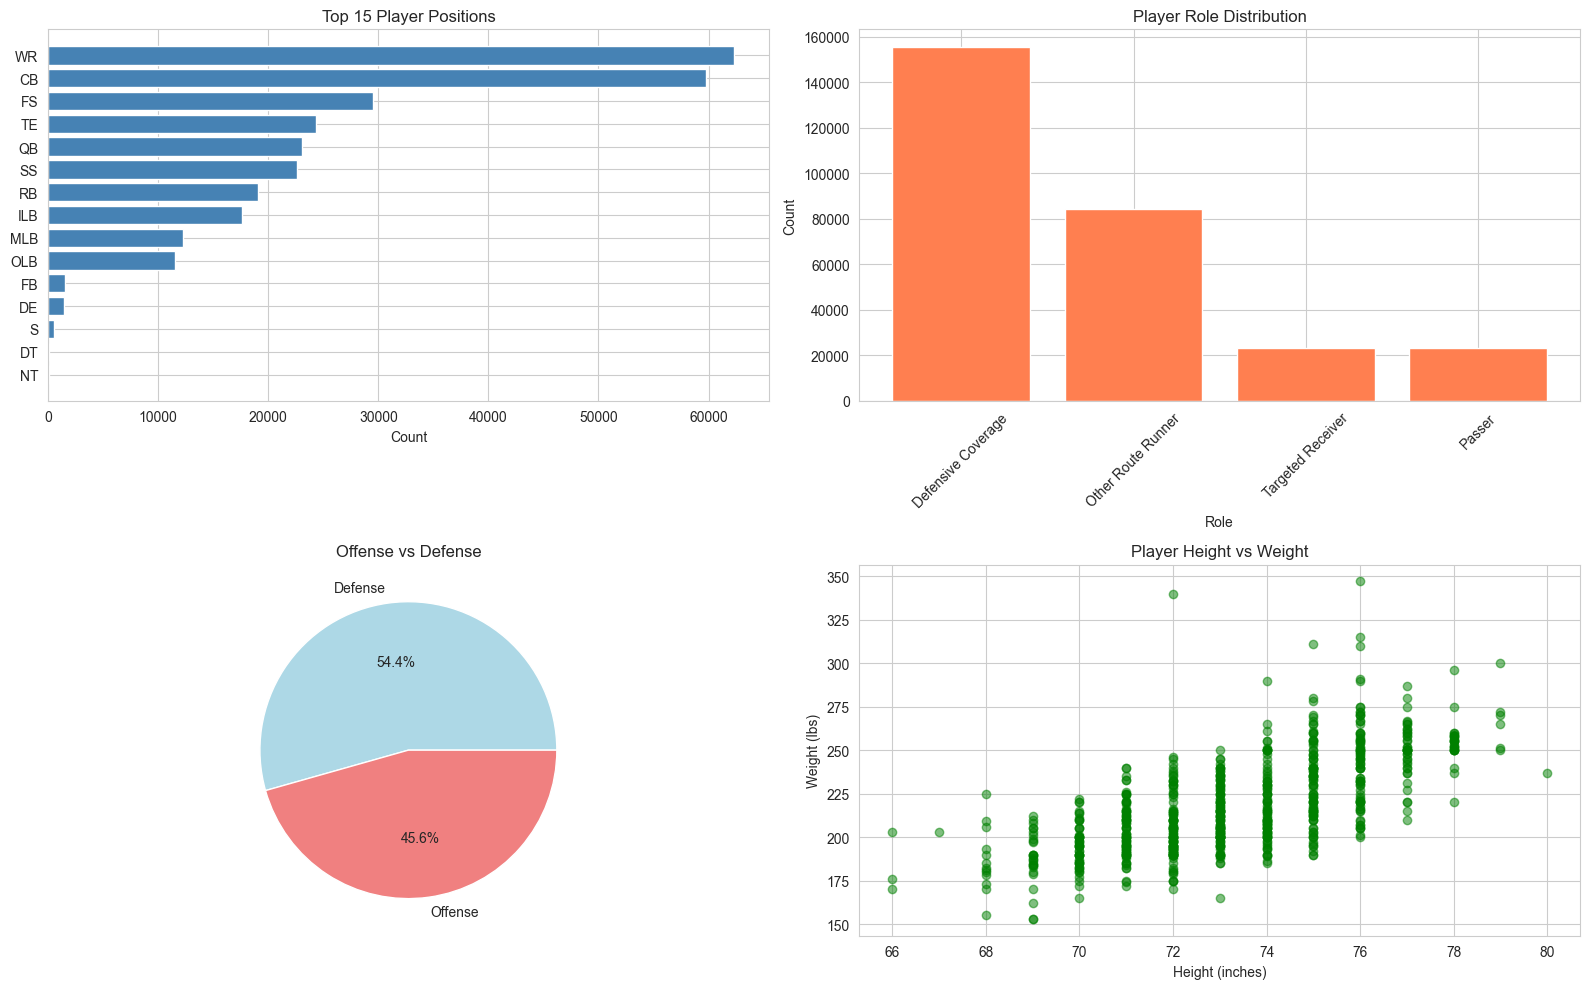

In [23]:
# Player-Level Distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Position distribution
pos_counts = merged_df['player_position'].value_counts().head(15)
axes[0, 0].barh(pos_counts.index, pos_counts.values, color='steelblue')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_title('Top 15 Player Positions')
axes[0, 0].invert_yaxis()

# Role distribution
role_counts = merged_df['player_role'].value_counts()
axes[0, 1].bar(role_counts.index, role_counts.values, color='coral')
axes[0, 1].set_xlabel('Role')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Player Role Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

# Side distribution
side_counts = merged_df['player_side'].value_counts()
axes[1, 0].pie(side_counts.values, labels=side_counts.index, autopct='%1.1f%%', 
               colors=['lightblue', 'lightcoral'])
axes[1, 0].set_title('Offense vs Defense')

# Height and Weight
player_info = merged_df[['nfl_id', 'player_height', 'player_weight']].drop_duplicates()
# Convert height to inches
def height_to_inches(h):
    if pd.isna(h):
        return np.nan
    parts = str(h).split('-')
    return int(parts[0]) * 12 + int(parts[1])

player_info['height_inches'] = player_info['player_height'].apply(height_to_inches)
axes[1, 1].scatter(player_info['height_inches'], player_info['player_weight'], 
                   alpha=0.5, color='green')
axes[1, 1].set_xlabel('Height (inches)')
axes[1, 1].set_ylabel('Weight (lbs)')
axes[1, 1].set_title('Player Height vs Weight')

plt.tight_layout()
plt.savefig(VIZ_PATH / "01_player_distributions.png", dpi=300, bbox_inches='tight')
plt.show()

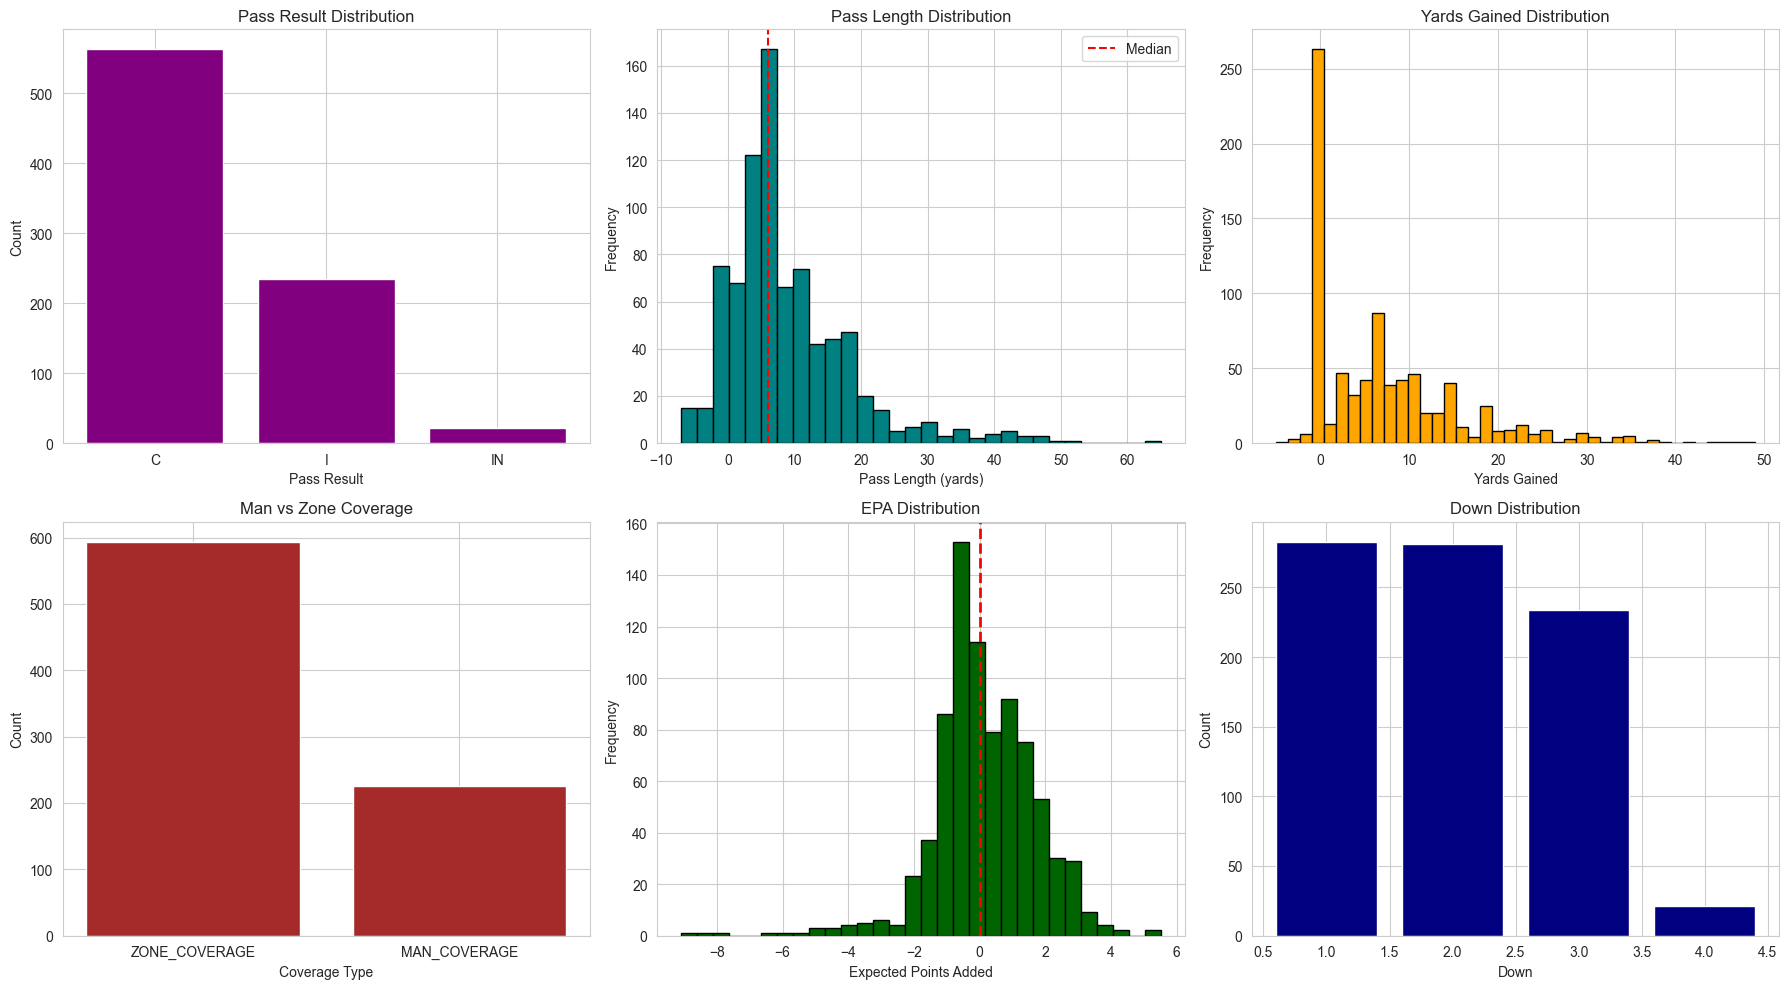

In [24]:
# Play-Level Distributions
# Get one row per play
play_level = merged_df.groupby(['game_id', 'play_id']).first().reset_index()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Pass result
pass_result_counts = play_level['pass_result'].value_counts()
axes[0, 0].bar(pass_result_counts.index, pass_result_counts.values, color='purple')
axes[0, 0].set_xlabel('Pass Result')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Pass Result Distribution')

# Pass length
axes[0, 1].hist(play_level['pass_length'].dropna(), bins=30, color='teal', edgecolor='black')
axes[0, 1].set_xlabel('Pass Length (yards)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Pass Length Distribution')
axes[0, 1].axvline(play_level['pass_length'].median(), color='red', linestyle='--', label='Median')
axes[0, 1].legend()

# Yards gained
axes[0, 2].hist(play_level['yards_gained'].dropna(), bins=40, color='orange', edgecolor='black')
axes[0, 2].set_xlabel('Yards Gained')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Yards Gained Distribution')

# Coverage type
coverage_counts = play_level['team_coverage_man_zone'].value_counts()
axes[1, 0].bar(coverage_counts.index, coverage_counts.values, color='brown')
axes[1, 0].set_xlabel('Coverage Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Man vs Zone Coverage')

# EPA
axes[1, 1].hist(play_level['expected_points_added'].dropna(), bins=30, 
                color='darkgreen', edgecolor='black')
axes[1, 1].set_xlabel('Expected Points Added')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('EPA Distribution')
axes[1, 1].axvline(0, color='red', linestyle='--', linewidth=2)

# Down distribution
down_counts = play_level['down'].value_counts().sort_index()
axes[1, 2].bar(down_counts.index, down_counts.values, color='navy')
axes[1, 2].set_xlabel('Down')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_title('Down Distribution')

plt.tight_layout()
plt.savefig(VIZ_PATH / "02_play_distributions.png", dpi=300, bbox_inches='tight')
plt.show()

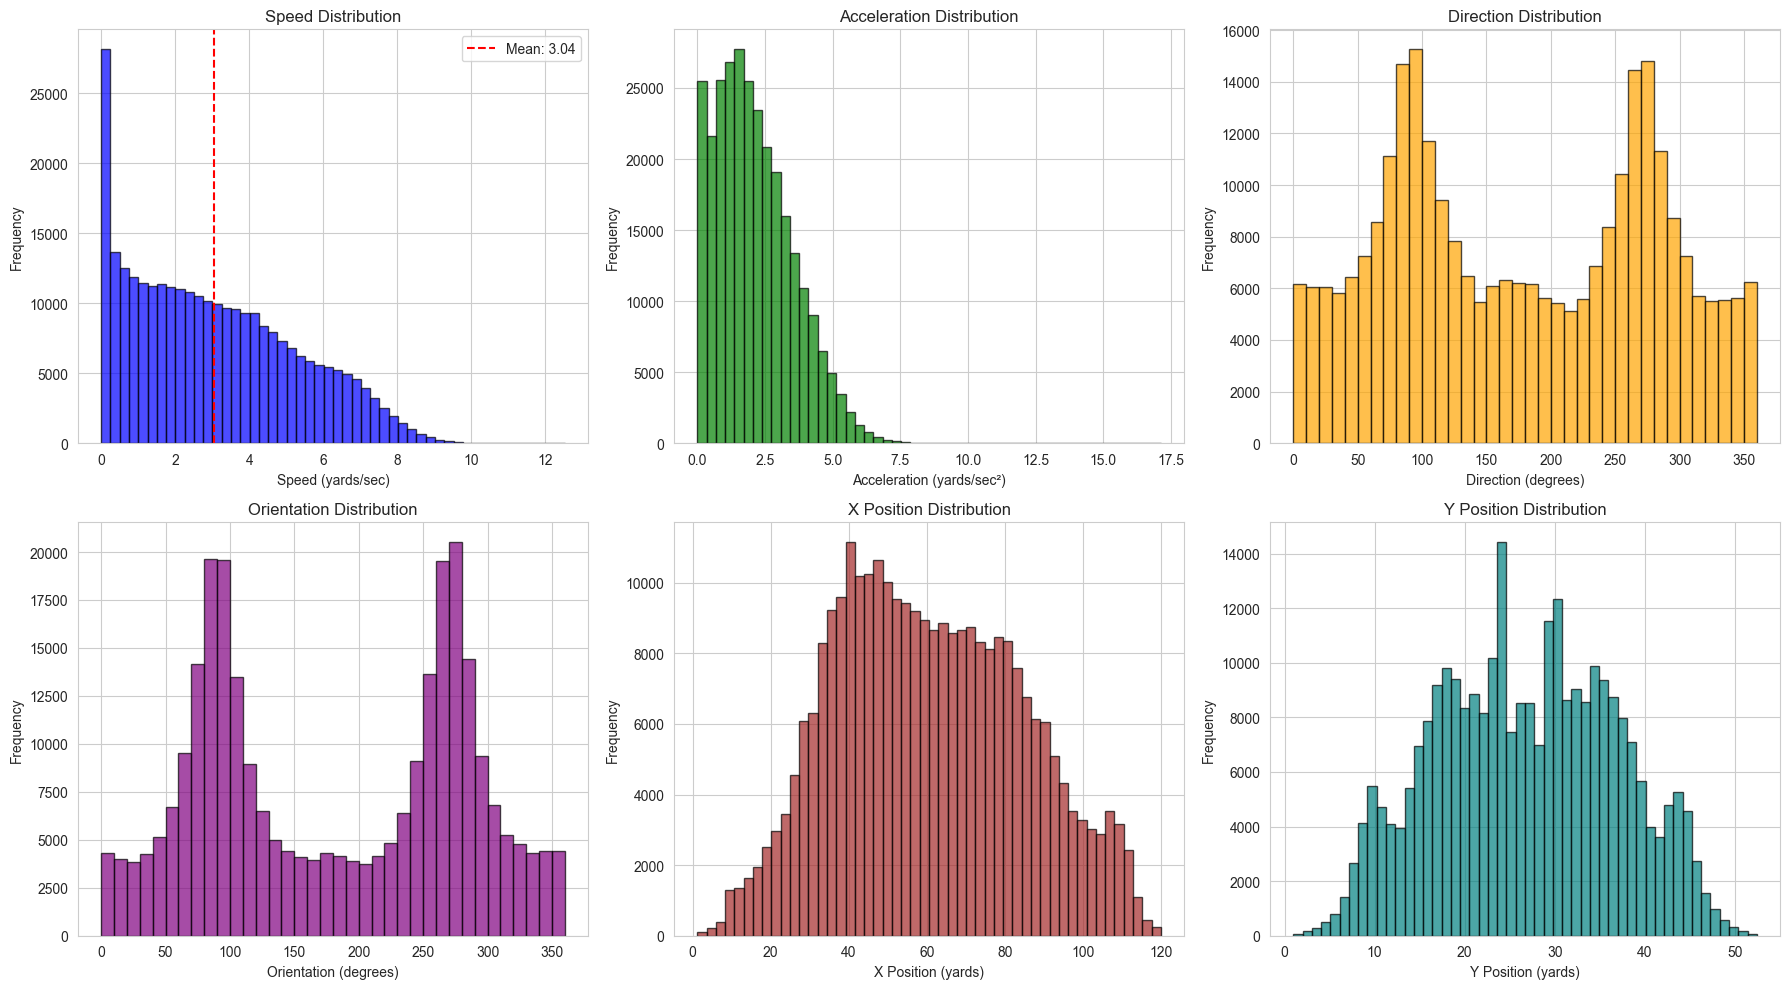

OUTLIER DETECTION
Speed > 12 yards/sec: 4 rows
Acceleration > 10 yards/sec²: 41 rows
X position outside [0, 120]: 0 rows
Y position outside [0, 53.3]: 0 rows


In [25]:
# Tracking Data Distributions (Speed, Acceleration, etc.)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Speed
axes[0, 0].hist(input_df['s'].dropna(), bins=50, color='blue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Speed (yards/sec)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Speed Distribution')
axes[0, 0].axvline(input_df['s'].mean(), color='red', linestyle='--', label=f"Mean: {input_df['s'].mean():.2f}")
axes[0, 0].legend()

# Acceleration
axes[0, 1].hist(input_df['a'].dropna(), bins=50, color='green', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Acceleration (yards/sec²)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Acceleration Distribution')

# Direction
axes[0, 2].hist(input_df['dir'].dropna(), bins=36, color='orange', edgecolor='black', alpha=0.7)
axes[0, 2].set_xlabel('Direction (degrees)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Direction Distribution')

# Orientation
axes[1, 0].hist(input_df['o'].dropna(), bins=36, color='purple', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Orientation (degrees)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Orientation Distribution')

# X position
axes[1, 1].hist(input_df['x'].dropna(), bins=50, color='brown', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('X Position (yards)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('X Position Distribution')

# Y position
axes[1, 2].hist(input_df['y'].dropna(), bins=50, color='teal', edgecolor='black', alpha=0.7)
axes[1, 2].set_xlabel('Y Position (yards)')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Y Position Distribution')

plt.tight_layout()
plt.savefig(VIZ_PATH / "03_tracking_distributions.png", dpi=300, bbox_inches='tight')
plt.show()

# Check for outliers
print("=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)
print(f"Speed > 12 yards/sec: {(input_df['s'] > 12).sum()} rows")
print(f"Acceleration > 10 yards/sec²: {(input_df['a'] > 10).sum()} rows")
print(f"X position outside [0, 120]: {((input_df['x'] < 0) | (input_df['x'] > 120)).sum()} rows")
print(f"Y position outside [0, 53.3]: {((input_df['y'] < 0) | (input_df['y'] > 53.3)).sum()} rows")

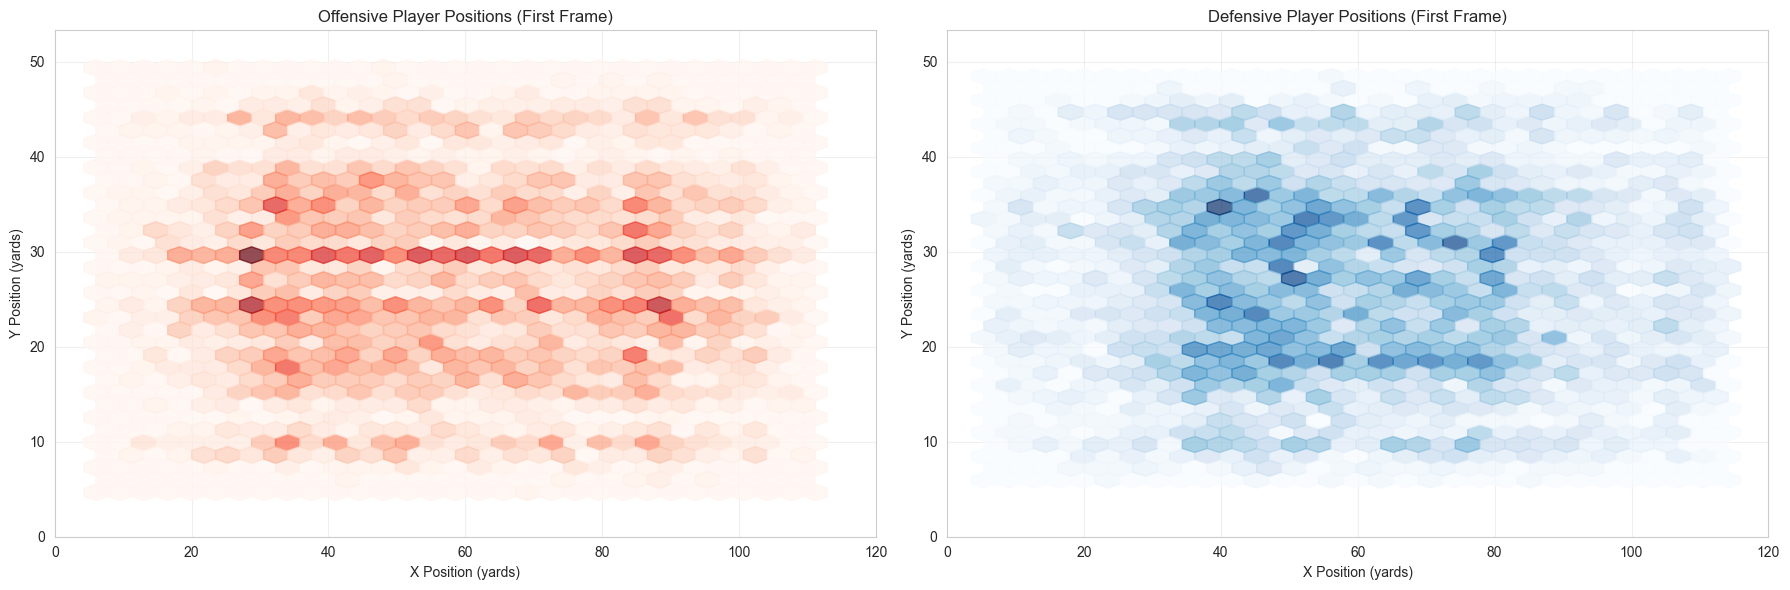

In [26]:
# Spatial Heatmap - Player Positions at First Frame
# Get first frame of each play
first_frames = input_df[input_df['frame_id'] == 1].copy()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Offense
offense = first_frames[first_frames['player_side'] == 'Offense']
axes[0].hexbin(offense['x'], offense['y'], gridsize=30, cmap='Reds', alpha=0.7)
axes[0].set_xlabel('X Position (yards)')
axes[0].set_ylabel('Y Position (yards)')
axes[0].set_title('Offensive Player Positions (First Frame)')
axes[0].set_xlim(0, 120)
axes[0].set_ylim(0, 53.3)
axes[0].grid(True, alpha=0.3)

# Defense
defense = first_frames[first_frames['player_side'] == 'Defense']
axes[1].hexbin(defense['x'], defense['y'], gridsize=30, cmap='Blues', alpha=0.7)
axes[1].set_xlabel('X Position (yards)')
axes[1].set_ylabel('Y Position (yards)')
axes[1].set_title('Defensive Player Positions (First Frame)')
axes[1].set_xlim(0, 120)
axes[1].set_ylim(0, 53.3)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(VIZ_PATH / "04_spatial_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

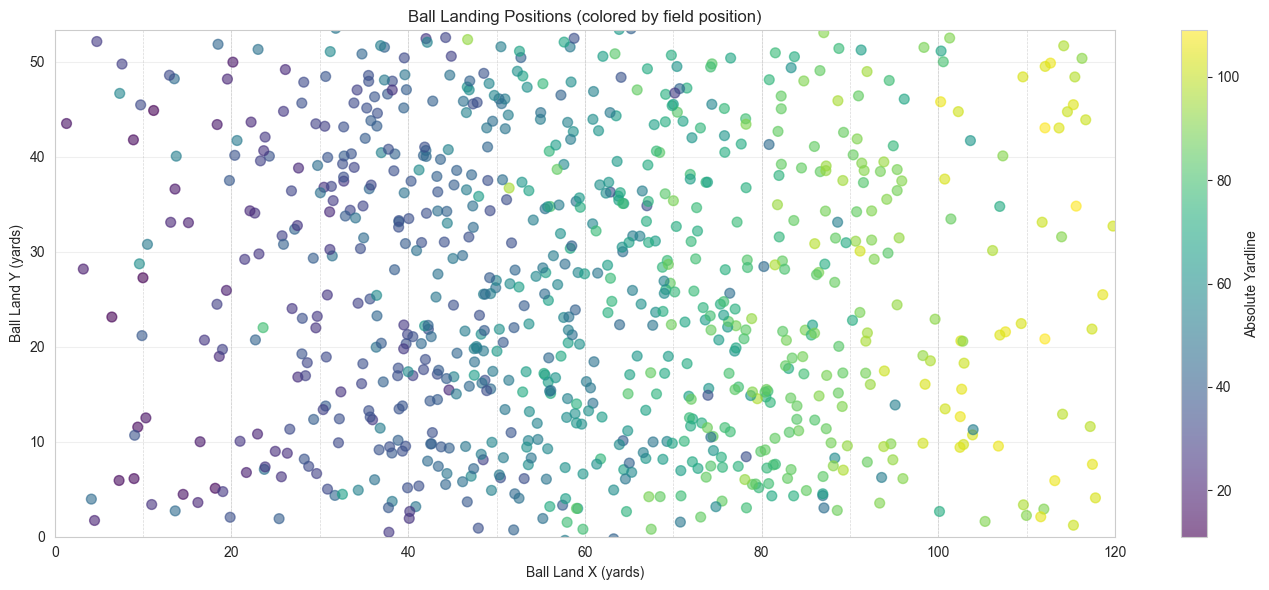

Ball landing X - Mean: 59.95, Std: 25.35
Ball landing Y - Mean: 25.96, Std: 15.10


In [27]:
# Ball Landing Positions
play_level_input = input_df.groupby(['game_id', 'play_id']).first().reset_index()

fig, ax = plt.subplots(figsize=(14, 6))

# Plot ball landing positions
scatter = ax.scatter(
    play_level_input['ball_land_x'], 
    play_level_input['ball_land_y'],
    c=play_level_input['absolute_yardline_number'],
    cmap='viridis',
    alpha=0.6,
    s=50
)

ax.set_xlabel('Ball Land X (yards)')
ax.set_ylabel('Ball Land Y (yards)')
ax.set_title('Ball Landing Positions (colored by field position)')
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)
ax.grid(True, alpha=0.3)

# Add field markings
for x in range(0, 121, 10):
    ax.axvline(x, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)

plt.colorbar(scatter, ax=ax, label='Absolute Yardline')
plt.tight_layout()
plt.savefig(VIZ_PATH / "05_ball_landing.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"Ball landing X - Mean: {play_level_input['ball_land_x'].mean():.2f}, "
      f"Std: {play_level_input['ball_land_x'].std():.2f}")
print(f"Ball landing Y - Mean: {play_level_input['ball_land_y'].mean():.2f}, "
      f"Std: {play_level_input['ball_land_y'].std():.2f}")

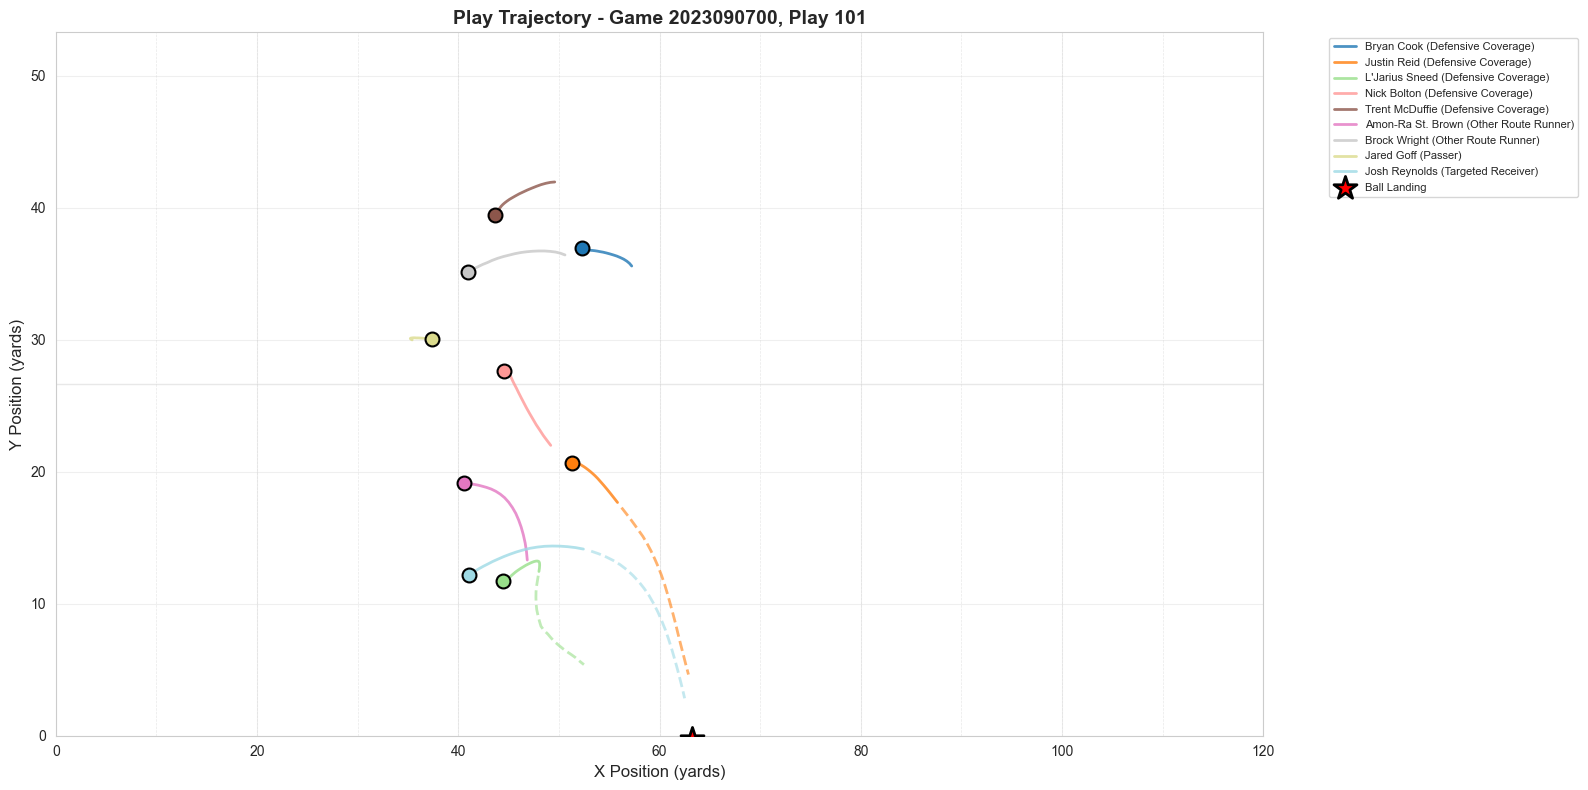

In [28]:
# Example Play Trajectory Visualization
def plot_play_trajectory(game_id, play_id, input_df, output_df):
    """Plot trajectories for a single play"""
    
    # Get input and output data for this play
    play_input = input_df[(input_df['game_id'] == game_id) & (input_df['play_id'] == play_id)]
    play_output = output_df[(output_df['game_id'] == game_id) & (output_df['play_id'] == play_id)]
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Draw field
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    ax.set_xlabel('X Position (yards)', fontsize=12)
    ax.set_ylabel('Y Position (yards)', fontsize=12)
    ax.set_title(f'Play Trajectory - Game {game_id}, Play {play_id}', fontsize=14, fontweight='bold')
    
    # Field markings
    for x in range(0, 121, 10):
        ax.axvline(x, color='lightgray', linestyle='--', alpha=0.5, linewidth=0.5)
    ax.axhline(53.3/2, color='lightgray', linestyle='-', alpha=0.5, linewidth=1)
    
    # Get unique players
    players = play_input['nfl_id'].unique()
    
    # Color map
    colors = plt.cm.tab20(np.linspace(0, 1, len(players)))
    
    for i, player_id in enumerate(players):
        player_input = play_input[play_input['nfl_id'] == player_id].sort_values('frame_id')
        player_output = play_output[play_output['nfl_id'] == player_id].sort_values('frame_id')
        
        player_name = player_input['player_name'].iloc[0]
        player_role = player_input['player_role'].iloc[0]
        
        # Plot input trajectory (solid line)
        ax.plot(player_input['x'], player_input['y'], 
                color=colors[i], linewidth=2, alpha=0.8, label=f"{player_name} ({player_role})")
        
        # Plot output trajectory (dashed line)
        if len(player_output) > 0:
            ax.plot(player_output['x'], player_output['y'], 
                    color=colors[i], linewidth=2, linestyle='--', alpha=0.6)
        
        # Mark start position
        ax.scatter(player_input['x'].iloc[0], player_input['y'].iloc[0], 
                   color=colors[i], s=100, marker='o', edgecolors='black', linewidths=1.5, zorder=5)
    
    # Plot ball landing position
    ball_x = play_input['ball_land_x'].iloc[0]
    ball_y = play_input['ball_land_y'].iloc[0]
    ax.scatter(ball_x, ball_y, color='red', s=300, marker='*', 
               edgecolors='black', linewidths=2, zorder=10, label='Ball Landing')
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# Plot first play
sample_play = input_df[['game_id', 'play_id']].drop_duplicates().iloc[0]
fig = plot_play_trajectory(sample_play['game_id'], sample_play['play_id'], input_df, output_df)
plt.savefig(VIZ_PATH / "06_example_trajectory.png", dpi=300, bbox_inches='tight')
plt.show()

Output frames - Min: 5, Max: 94, Mean: 11.01, Median: 9.0


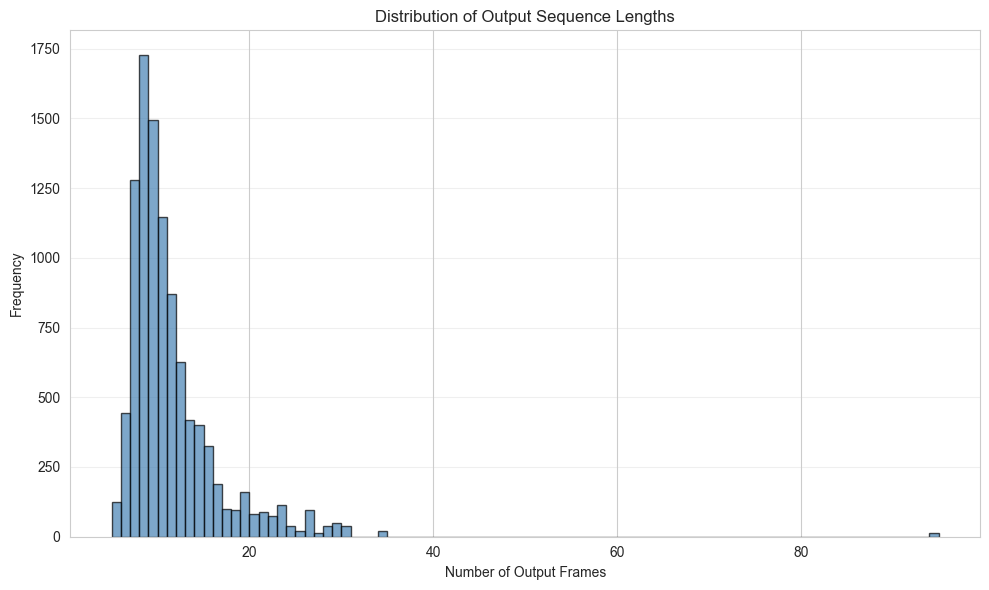

In [29]:
# num_frames_output Distribution
frames_dist = input_df.groupby(['game_id', 'play_id', 'nfl_id'])['num_frames_output'].first()

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(frames_dist, bins=range(int(frames_dist.min()), int(frames_dist.max()) + 2), 
        color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of Output Frames')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Output Sequence Lengths')
ax.grid(True, alpha=0.3, axis='y')

print(f"Output frames - Min: {frames_dist.min()}, Max: {frames_dist.max()}, "
      f"Mean: {frames_dist.mean():.2f}, Median: {frames_dist.median()}")

plt.tight_layout()
plt.savefig(VIZ_PATH / "07_output_frames_dist.png", dpi=300, bbox_inches='tight')
plt.show()

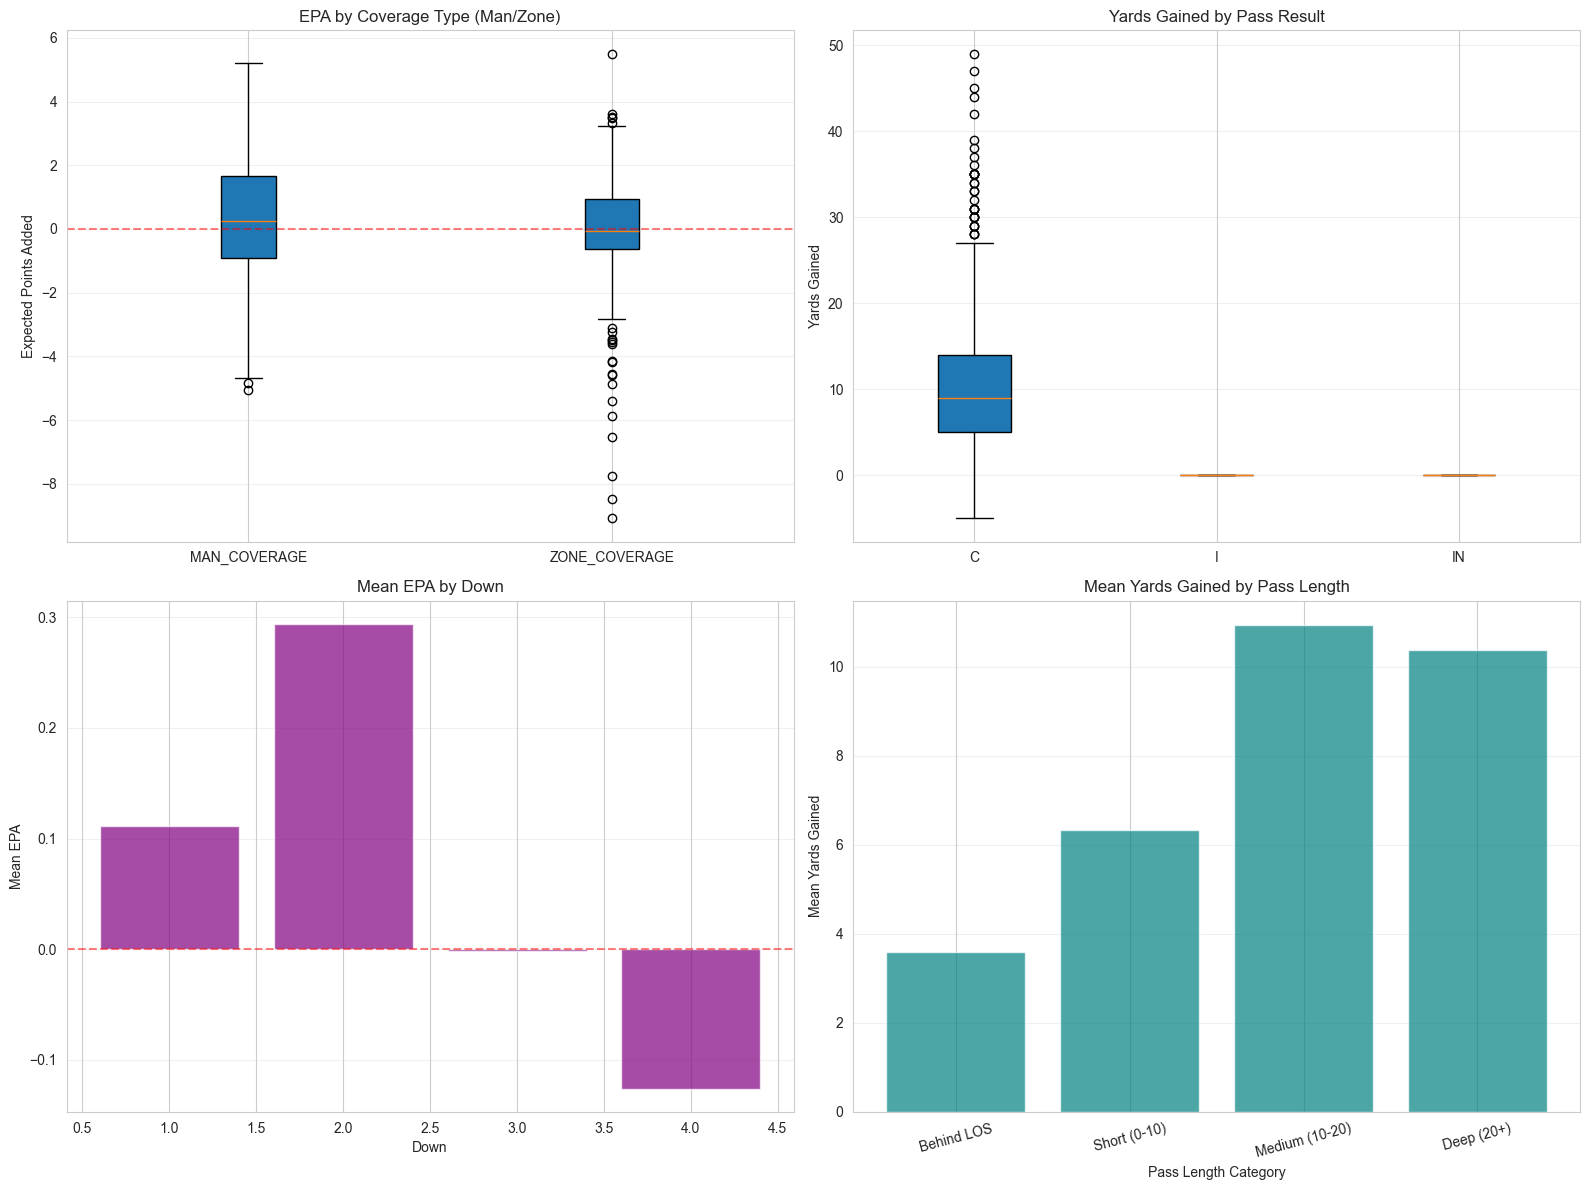

In [30]:
# Context Relationships - EPA by Coverage Type
play_level_merged = merged_df.groupby(['game_id', 'play_id']).first().reset_index()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# EPA by Man/Zone
coverage_epa = play_level_merged.groupby('team_coverage_man_zone')['expected_points_added'].apply(list)
axes[0, 0].boxplot([coverage_epa[key] for key in coverage_epa.index if len(coverage_epa[key]) > 0],
                    labels=coverage_epa.index, patch_artist=True)
axes[0, 0].set_ylabel('Expected Points Added')
axes[0, 0].set_title('EPA by Coverage Type (Man/Zone)')
axes[0, 0].axhline(0, color='red', linestyle='--', alpha=0.5)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Yards gained by pass result
pass_result_yards = play_level_merged.groupby('pass_result')['yards_gained'].apply(list)
valid_results = [key for key in pass_result_yards.index if len(pass_result_yards[key]) > 0]
axes[0, 1].boxplot([pass_result_yards[key] for key in valid_results],
                    labels=valid_results, patch_artist=True)
axes[0, 1].set_ylabel('Yards Gained')
axes[0, 1].set_title('Yards Gained by Pass Result')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# EPA by down
down_epa = play_level_merged.groupby('down')['expected_points_added'].mean().sort_index()
axes[1, 0].bar(down_epa.index, down_epa.values, color='purple', alpha=0.7)
axes[1, 0].set_xlabel('Down')
axes[1, 0].set_ylabel('Mean EPA')
axes[1, 0].set_title('Mean EPA by Down')
axes[1, 0].axhline(0, color='red', linestyle='--', alpha=0.5)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Pass length bins vs yards gained
play_level_merged['pass_length_bin'] = pd.cut(play_level_merged['pass_length'], 
                                                bins=[-np.inf, 0, 10, 20, np.inf],
                                                labels=['Behind LOS', 'Short (0-10)', 'Medium (10-20)', 'Deep (20+)'])
length_yards = play_level_merged.groupby('pass_length_bin')['yards_gained'].mean()
axes[1, 1].bar(range(len(length_yards)), length_yards.values, 
               tick_label=length_yards.index, color='teal', alpha=0.7)
axes[1, 1].set_xlabel('Pass Length Category')
axes[1, 1].set_ylabel('Mean Yards Gained')
axes[1, 1].set_title('Mean Yards Gained by Pass Length')
axes[1, 1].tick_params(axis='x', rotation=15)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(VIZ_PATH / "08_context_relationships.png", dpi=300, bbox_inches='tight')
plt.show()

In [31]:
# Key Findings Summary
print("=" * 80)
print("KEY FINDINGS FROM EDA")
print("=" * 80)

findings = """
1. DATA QUALITY:
   - Input data has {input_rows:,} rows across {input_plays} plays
   - Output data has {output_rows:,} rows
   - {missing_rate:.1f}% of plays successfully joined with supplementary data
   - Key missing fields: {missing_fields}

2. PLAYER CHARACTERISTICS:
   - {n_players} unique players tracked
   - Most common positions: {top_positions}
   - Defensive coverage players: {def_coverage_pct:.1f}%

3. PLAY CHARACTERISTICS:
   - Pass completion rate: {completion_rate:.1f}%
   - Mean pass length: {mean_pass_length:.1f} yards
   - Mean yards gained: {mean_yards_gained:.1f} yards
   - Zone coverage: {zone_pct:.1f}%, Man coverage: {man_pct:.1f}%

4. TRACKING DATA:
   - Mean player speed: {mean_speed:.2f} yards/sec
   - Speed outliers (>12 yds/sec): {speed_outliers} instances
   - Output sequence length: {mean_output_frames:.1f} frames (median: {median_output_frames})

5. SPATIAL PATTERNS:
   - Ball landing concentrated in middle third of field (Y: {ball_y_mean:.1f} ± {ball_y_std:.1f})
   - Offensive formations cluster near line of scrimmage
   - Defensive coverage spreads across field width

6. HYPOTHESES FOR FEATURE ENGINEERING:
   - Separation between receiver and nearest defender likely predicts catch success
   - Coverage type (Man/Zone) affects post-throw movement patterns
   - Pre-throw velocity and acceleration may predict post-throw trajectory
   - Distance to ball landing spot is key feature for all players
   - Route type and formation should be encoded as contextual features
"""

# Calculate stats
input_rows = len(input_df)
input_plays = input_df[['game_id', 'play_id']].drop_duplicates().shape[0]
output_rows = len(output_df)
missing_rate = merged_df['pass_result'].notna().mean() * 100
missing_fields = ", ".join(input_missing.head(3).index.tolist()) if len(input_missing) > 0 else "None"
n_players = merged_df['nfl_id'].nunique()
top_positions = ", ".join(merged_df['player_position'].value_counts().head(3).index.tolist())
def_coverage_pct = (merged_df['player_role'] == 'Defensive Coverage').mean() * 100
completion_rate = (play_level['pass_result'] == 'C').mean() * 100 if 'pass_result' in play_level.columns else 0
mean_pass_length = play_level['pass_length'].mean() if 'pass_length' in play_level.columns else 0
mean_yards_gained = play_level['yards_gained'].mean() if 'yards_gained' in play_level.columns else 0
zone_pct = (play_level['team_coverage_man_zone'] == 'Zone').mean() * 100 if 'team_coverage_man_zone' in play_level.columns else 0
man_pct = (play_level['team_coverage_man_zone'] == 'Man').mean() * 100 if 'team_coverage_man_zone' in play_level.columns else 0
mean_speed = input_df['s'].mean()
speed_outliers = (input_df['s'] > 12).sum()
mean_output_frames = frames_dist.mean()
median_output_frames = frames_dist.median()
ball_y_mean = play_level_input['ball_land_y'].mean()
ball_y_std = play_level_input['ball_land_y'].std()

print(findings.format(
    input_rows=input_rows,
    input_plays=input_plays,
    output_rows=output_rows,
    missing_rate=missing_rate,
    missing_fields=missing_fields,
    n_players=n_players,
    top_positions=top_positions,
    def_coverage_pct=def_coverage_pct,
    completion_rate=completion_rate,
    mean_pass_length=mean_pass_length,
    mean_yards_gained=mean_yards_gained,
    zone_pct=zone_pct,
    man_pct=man_pct,
    mean_speed=mean_speed,
    speed_outliers=speed_outliers,
    mean_output_frames=mean_output_frames,
    median_output_frames=median_output_frames,
    ball_y_mean=ball_y_mean,
    ball_y_std=ball_y_std
))

print("\n✅ EDA Complete! Visualizations saved to:", VIZ_PATH)

KEY FINDINGS FROM EDA

1. DATA QUALITY:
   - Input data has 285,714 rows across 819 plays
   - Output data has 32,088 rows
   - 100.0% of plays successfully joined with supplementary data
   - Key missing fields: None

2. PLAYER CHARACTERISTICS:
   - 737 unique players tracked
   - Most common positions: WR, CB, FS
   - Defensive coverage players: 54.4%

3. PLAY CHARACTERISTICS:
   - Pass completion rate: 68.7%
   - Mean pass length: 8.9 yards
   - Mean yards gained: 7.5 yards
   - Zone coverage: 0.0%, Man coverage: 0.0%

4. TRACKING DATA:
   - Mean player speed: 3.04 yards/sec
   - Speed outliers (>12 yds/sec): 4 instances
   - Output sequence length: 11.0 frames (median: 9.0)

5. SPATIAL PATTERNS:
   - Ball landing concentrated in middle third of field (Y: 26.0 ± 15.1)
   - Offensive formations cluster near line of scrimmage
   - Defensive coverage spreads across field width

6. HYPOTHESES FOR FEATURE ENGINEERING:
   - Separation between receiver and nearest defender likely predicts 